# RENDIMIENTOS HISTÓRICOS

# Instalamos las librerías

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Descargar los precios de cierre de los activos
large_cap = yf.download("^GSPC", start="2010-01-01", end="2023-04-25")['Adj Close']
small_cap = yf.download("^RUT", start="2010-01-01", end="2023-04-25")['Adj Close']
corp_bonds = yf.download("LQD", start="2010-01-01", end="2023-04-25")['Adj Close']
riskfree = yf.download("^TNX", start="2010-01-01", end="2023-04-25")['Adj Close'] / 100

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
returns = pd.concat([large_cap, small_cap, corp_bonds, riskfree], axis=1).pct_change().dropna()

In [4]:
series_names = ['large_cap', 'small_cap', 'corp_bonds', 'riskfree']
#returns = returns.rename(columns=dict(zip(returns.columns, series_names)))
returns.columns = series_names

In [5]:
returns.columns
# Renombra las columnas para cada serie
#returns.rename(columns={'large_cap', 'small_cap', 'corp_bonds', 'riskfree'}, inplace=True)

Index(['large_cap', 'small_cap', 'corp_bonds', 'riskfree'], dtype='object')

In [6]:
series_names

['large_cap', 'small_cap', 'corp_bonds', 'riskfree']

In [7]:
returns.head()

,large_cap,small_cap,corp_bonds,riskfree
Date,,,,
2010-01-05,0.003116,-0.002515,0.004776,-0.022390
2010-01-06,0.000546,-0.000846,-0.002947,0.014115
2010-01-07,0.004001,0.006301,0.001240,0.003676
2010-01-08,0.002882,0.004034,0.002190,-0.003663
2010-01-11,0.001747,-0.000884,0.001045,0.002626


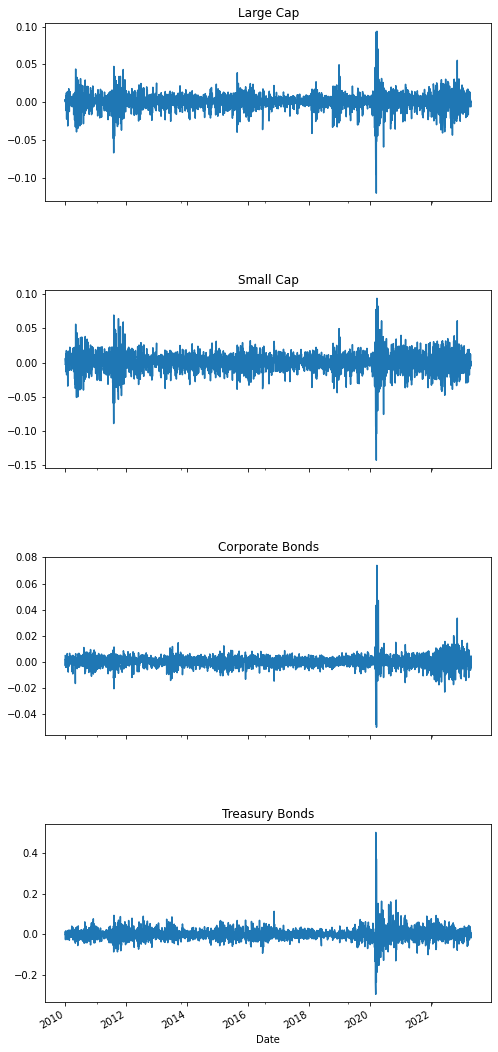

In [8]:
# Crea una figura con cinco subplots
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8, 20), sharex=True)
# Grafica cada columna en su subplot correspondiente
returns['large_cap'].plot(ax=axs[0])
axs[0].set_title('Large Cap')
returns['small_cap'].plot(ax=axs[1])
axs[1].set_title('Small Cap')
returns['corp_bonds'].plot(ax=axs[2])
axs[2].set_title('Corporate Bonds')
returns['riskfree'].plot(ax=axs[3])
axs[3].set_title('Treasury Bonds')

# Ajusta el espacio entre subplots
plt.subplots_adjust(hspace=0.5)

# Muestra la figura
plt.show()

In [9]:
monthly_returns = returns.resample('M').apply(lambda x: np.prod(1 + x) - 1)

In [10]:
monthly_returns.head()

,large_cap,small_cap,corp_bonds,riskfree
Date,,,,
2010-01-31,-0.052181,-0.059459,0.007163,-0.060401
2010-02-28,0.028514,0.044050,0.005067,-0.003879
2010-03-31,0.058796,0.079674,0.006518,0.066203
2010-04-30,0.014759,0.055935,0.019079,-0.044352
2010-05-31,-0.081976,-0.076737,-0.013083,-0.098826


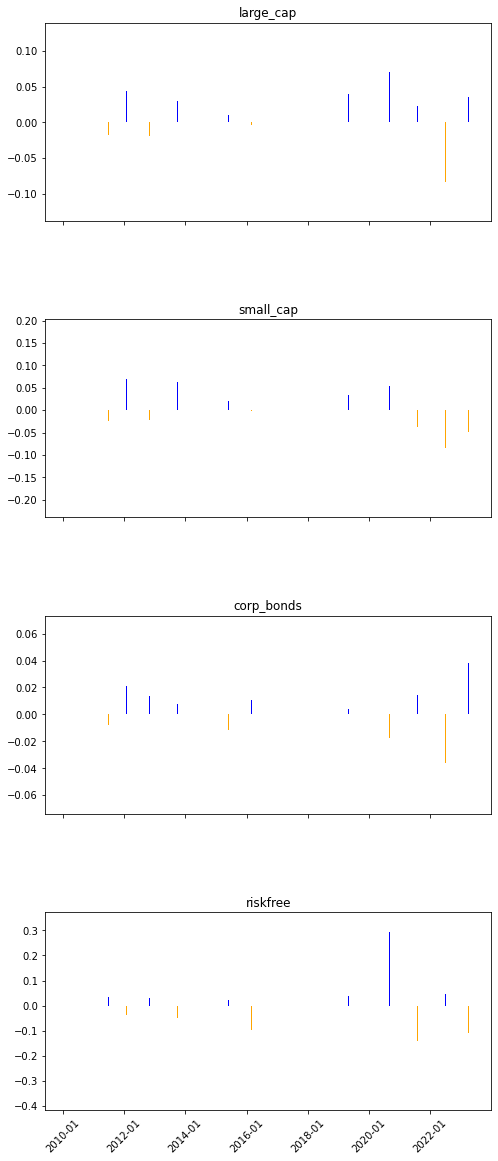

In [11]:
import matplotlib.dates as mdates
# Crea una figura con cinco subplots
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8, 20), sharex=True)

# Grafica cada columna en su subplot correspondiente
for i, col in enumerate(monthly_returns.columns):
    # Crea un nuevo DataFrame con los rendimientos mensuales y la columna Positive
    df = pd.DataFrame({'Returns': monthly_returns[col], 'Positive': monthly_returns[col] > 0})
    # Crea un subplot con barras y establece el color de cada barra según la columna Positive
    axs[i].bar(df.index, df['Returns'], color=df['Positive'].map({True: 'b', False: 'orange'}))
    # Establece el título del subplot
    axs[i].set_title(col)

# Establece el formato de fecha personalizado en el eje X
date_format = mdates.DateFormatter('%Y-%m')
for ax in axs:
    ax.xaxis.set_major_formatter(date_format)
    ax.tick_params(axis='x', labelrotation=45)

# Ajusta el espacio entre subplots
plt.subplots_adjust(hspace=0.5)

# Muestra la figura
plt.show()

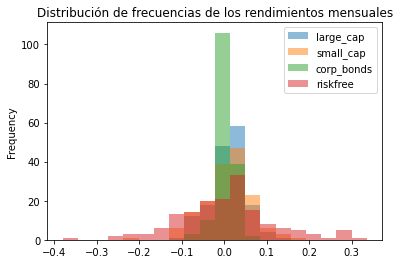

In [12]:
monthly_returns.plot(kind='hist', bins=20, alpha=0.5)
plt.title('Distribución de frecuencias de los rendimientos mensuales')
plt.show()

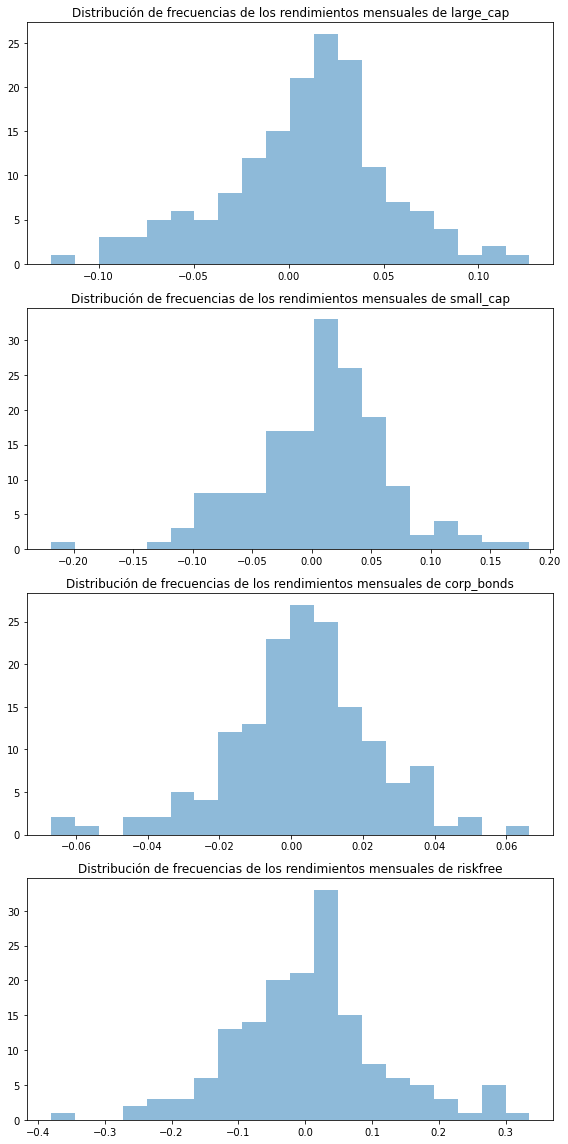

In [13]:
# Crear una figura con múltiples subplots
fig, axs = plt.subplots(nrows=len(monthly_returns.columns), ncols=1, figsize=(8, 4*len(monthly_returns.columns)))

# Iterar a través de las columnas y graficar cada una en un subplot separado
for i, column in enumerate(monthly_returns.columns):
    axs[i].hist(monthly_returns[column], bins=20, alpha=0.5)
    axs[i].set_title(f'Distribución de frecuencias de los rendimientos mensuales de {column}')

# Ajustar la disposición de los subplots y mostrar la figura
plt.tight_layout()
plt.show()

In [14]:
# Tabla de estadísticas descriptivas
stats = monthly_returns.describe()
print(stats)

        large_cap   small_cap  corp_bonds    riskfree
count  160.000000  160.000000  160.000000  160.000000
mean     0.009040    0.008038    0.003380    0.005864
std      0.042777    0.056339    0.020740    0.113317
min     -0.125119   -0.218995   -0.066993   -0.380657
25%     -0.015188   -0.023197   -0.007289   -0.061210
50%      0.015042    0.012845    0.004408    0.010034
75%      0.035191    0.040649    0.013444    0.055287
max      0.126844    0.182869    0.066477    0.335773


In [15]:
from scipy.stats import shapiro, skew, kurtosis, variation

# Calcular los estadísticos descriptivos
stats = pd.DataFrame(index=monthly_returns.columns, columns=['Shapiro-Wilk p-value', 'Skewness', 'Kurtosis', 'Coefficient of variation'])
for column in monthly_returns.columns:
    stats.loc[column, 'Shapiro-Wilk p-value'] = shapiro(monthly_returns[column])[1]
    stats.loc[column, 'Skewness'] = skew(monthly_returns[column])
    stats.loc[column, 'Kurtosis'] = kurtosis(monthly_returns[column])
    stats.loc[column, 'Coefficient of variation'] = variation(monthly_returns[column])

# Mostrar la tabla
print(stats)

           Shapiro-Wilk p-value  Skewness  Kurtosis Coefficient of variation
large_cap              0.025784  -0.35871  0.491118                 4.717125
small_cap              0.012942 -0.327547  1.442062                  6.98733
corp_bonds             0.004041 -0.391287   1.41534                 6.117369
riskfree               0.015284  0.155784  1.020225                19.263095


In [53]:
#from datetime import datetime
copia_monthly_returns=monthly_returns.copy()
Years=[int(str(copia_monthly_returns.index[i])[0:4]) for i in range(len(copia_monthly_returns))]
copia_monthly_returns['Year']=Years


In [54]:
copia_monthly_returns.Year

Date
2010-01-31    2010
2010-02-28    2010
2010-03-31    2010
2010-04-30    2010
2010-05-31    2010
              ... 
2022-12-31    2022
2023-01-31    2023
2023-02-28    2023
2023-03-31    2023
2023-04-30    2023
Freq: M, Name: Year, Length: 160, dtype: int64

In [55]:
Monthly_gr=copia_monthly_returns.groupby('Year')
Monthly_gr

In [56]:
Monthly_gr.mean()

,large_cap,small_cap,corp_bonds,riskfree
Year,,,,
2010,0.010231,0.019369,0.007121,-0.008648
2011,0.000955,-0.002616,0.007930,-0.042342
2012,0.010970,0.012082,0.008241,-0.000784
2013,0.022121,0.027030,-0.001539,0.051343
2014,0.009280,0.003810,0.006651,-0.025881
2015,0.000094,-0.004084,-0.000943,0.008859
2016,0.008014,0.016195,0.005187,0.013506
2017,0.014956,0.010567,0.005714,-0.000441
2018,-0.004435,-0.009261,-0.003136,0.011335


In [57]:
Monthly_gr.var()

,large_cap,small_cap,corp_bonds,riskfree
Year,,,,
2010,0.003259,0.005159,0.000248,0.008356
2011,0.002126,0.004529,0.000336,0.008228
2012,0.000929,0.001382,0.000177,0.009427
2013,0.000610,0.000993,0.000313,0.011765
2014,0.000548,0.001995,0.000117,0.003072
2015,0.001555,0.001751,0.000241,0.010729
2016,0.000870,0.002755,0.000346,0.016259
2017,0.000126,0.000498,0.000036,0.002130
2018,0.001950,0.003117,0.000166,0.004576


In [16]:
# Primero, creamos una nueva columna en el DataFrame que contenga el año correspondiente a cada fecha
#monthly_returns['Year'] = monthly_returns.index.year

# Luego, utilizamos el método pivot_table() de pandas para calcular las estadísticas descriptivas para cada año
#stats = pd.pivot_table(monthly_returns, values=monthly_returns.columns[:-1], index='Year', aggfunc=[np.mean, np.std, np.min, np.max, skew, kurtosis, variation])

# Renombramos las columnas para que sean más descriptivas
#stats.columns = ['_'.join(col).strip() for col in stats.columns.values]

# Mostramos la tabla
#print(stats)

In [17]:
#Los rendimientos mensuales fueron anualizados
annual_returns = monthly_returns.apply(lambda x: (1 + x) ** 12 - 1)

In [18]:
annual_returns.head()

,large_cap,small_cap,corp_bonds,riskfree
Date,,,,
2010-01-31,-0.474337,-0.520785,0.089425,-0.526510
2010-02-28,0.401267,0.677478,0.062532,-0.045570
2010-03-31,0.984950,1.509070,0.081085,1.158137
2010-04-30,0.192219,0.921533,0.254567,-0.419800
2010-05-31,-0.641698,-0.616378,-0.146177,-0.713118


In [19]:
# Rendimiento anual con datos mensuales TWRR
returns_annual = ((1 + monthly_returns).resample('Y').prod() - 1)
returns_annual.head()

,large_cap,small_cap,corp_bonds,riskfree
Date,,,,
2010-12-31,0.110019,0.224262,0.087422,-0.139547
2011-12-31,-0.000032,-0.054527,0.097408,-0.433888
2012-12-31,0.134057,0.146345,0.102443,-0.061464
2013-12-31,0.296012,0.370036,-0.020017,0.723235
2014-12-31,0.113906,0.035286,0.082100,-0.282882


In [20]:
monthly_volatility = monthly_returns.std()
annual_volatility = monthly_volatility * np.sqrt(12)
print(monthly_volatility)
print(annual_volatility)

large_cap     0.042777
small_cap     0.056339
corp_bonds    0.020740
riskfree      0.113317
dtype: float64
large_cap     0.148183
small_cap     0.195164
corp_bonds    0.071845
riskfree      0.392541
dtype: float64


# PRIMAS DE RIESGO

In [21]:
from scipy.stats import describe

# Calculamos las primas de riesgo para cada categoría
returns['large_cap_risk_premium'] = returns['large_cap'] - returns['riskfree']
returns['small_cap_risk_premium'] = returns['small_cap'] - returns['riskfree']
returns['corp_bonds_risk_premium'] = returns['corp_bonds'] - returns['riskfree']

# Creamos una tabla con las estadísticas descriptivas de las primas de riesgo para cada categoría
risk_premium_stats = pd.DataFrame({
    'Large Cap': [returns['large_cap_risk_premium'].mean(), 
                  returns['large_cap_risk_premium'].std(), 
                  returns['large_cap_risk_premium'].min(), 
                  returns['large_cap_risk_premium'].max()],
    'Small Cap': [returns['small_cap_risk_premium'].mean(), 
                  returns['small_cap_risk_premium'].std(), 
                  returns['small_cap_risk_premium'].min(), 
                  returns['small_cap_risk_premium'].max()],
    'Corporate Bonds': [returns['corp_bonds_risk_premium'].mean(), 
                        returns['corp_bonds_risk_premium'].std(), 
                        returns['corp_bonds_risk_premium'].min(), 
                        returns['corp_bonds_risk_premium'].max()]
}, index=['Media', 'Desviación Estándar', 'Mínimo', 'Máximo'])

# Mostramos la tabla
print(risk_premium_stats)

                     Large Cap  Small Cap  Corporate Bonds
Media                 0.000036  -0.000001        -0.000251
Desviación Estándar   0.028049   0.028534         0.032828
Mínimo               -0.449602  -0.470477        -0.521515
Máximo                0.220527   0.217565         0.268922


In [22]:
# Wealth index
wealth_index = (1 + monthly_returns).cumprod()

<Figure size 1080x720 with 0 Axes>

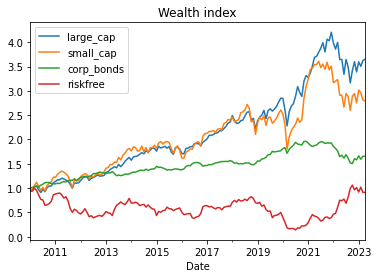

In [23]:
# Gráficas de wealth index por separado
fig = plt.figure(figsize=(15, 10))# Crear una nueva figura con tamaño 15x10 pulgadas
wealth_index.plot()
plt.title('Wealth index')
plt.show()

In [24]:
# Drawdown
wealth_index['large_cap'] = wealth_index['large_cap'].fillna(method='ffill')
wealth_index['small_cap'] = wealth_index['small_cap'].fillna(method='ffill')
wealth_index['corp_bonds'] = wealth_index['corp_bonds'].fillna(method='ffill')
wealth_index['riskfree'] = wealth_index['riskfree'].fillna(method='ffill')

previous_peaks = wealth_index.cummax()
drawdowns = (wealth_index - previous_peaks) / previous_peaks

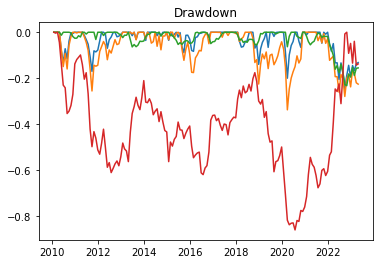

In [25]:
# Crear una nueva figura
fig = plt.figure()

# Gráfica de drawdown
plt.plot(drawdowns)
plt.title('Drawdown')
plt.show()